In [98]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [48]:
dataset = tf.data.TFRecordDataset([
    "gs://bathy_sample/processed/20211009/large_images/100_102large_images.tfrecords"
])


In [50]:
examples = dataset.take(10)
examples

<TakeDataset shapes: (), types: tf.string>

In [106]:
raw_example = next(iter(dataset))


b'\n\x91\x81 \n\x10\n\x06height\x12\x06\x1a\x04\n\x02\x80\x02\n\x0f\n\x05width\x12\x06\x1a\x04\n\x02\x80\x02\n\x0e\n\x05depth\x12\x05\x1a\x03\n\x01\x01\n\xad\x80\x10\n\traw_image\x12\x9e\x80\x10\n\x9a\x80\x10\n\x96\x80\x10\x08\x01\x12\x0e\x12\x03\x08\x80\x02\x12\x03\x08\x80\x02\x12\x02\x08\x01"\x80\x80\x10\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\xc0\xd3X>\xc0\xd3X>`\x9b\x1c?`\x9b\x1c?\x90\xceO?\xe0\x80\x81?\xe0\x80\x81?\x90\xceO?`\x9b\x1c?`\x9b\x1c?\xc0\xd3X>\xc0\xd3X>\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<\x00p@<

In [121]:
example_bytes = list(examples)[0].numpy()


def tf_parse(eg):
    example = tf.io.parse_example(
        eg[tf.newaxis],
        {
            "width": tf.io.FixedLenFeature(shape=(), dtype=tf.int64),
            "height": tf.io.FixedLenFeature(shape=(), dtype=tf.int64),
            "label": tf.io.FixedLenFeature(shape=(), dtype=tf.string),
            "raw_image": tf.io.FixedLenFeature(shape=(), dtype=tf.string),
            "depth": tf.io.FixedLenFeature(shape=(), dtype=tf.int64),
        },
    )
    raw_image = tf.io.parse_tensor(example["raw_image"][0], out_type="float32")
    label = tf.io.parse_tensor(example["label"][0], out_type="float32")
    return raw_image, label


next(iter(dataset.map(tf_parse)))

(<tf.Tensor: shape=(256, 256, 1), dtype=float32, numpy=
 array([[[0.01174545],
         [0.01174545],
         [0.01174545],
         ...,
         [0.01174545],
         [0.01174545],
         [0.01174545]],
 
        [[0.01174545],
         [0.01174545],
         [0.01174545],
         ...,
         [0.01174545],
         [0.01174545],
         [0.01174545]],
 
        [[0.01174545],
         [0.01174545],
         [0.01174545],
         ...,
         [0.01174545],
         [0.01174545],
         [0.01174545]],
 
        ...,
 
        [[0.21174526],
         [0.21174526],
         [0.21174526],
         ...,
         [0.21174526],
         [0.01174545],
         [0.01174545]],
 
        [[0.61174583],
         [0.61174583],
         [0.61174583],
         ...,
         [0.41174507],
         [0.21174526],
         [0.01174545]],
 
        [[0.61174583],
         [0.61174583],
         [0.61174583],
         ...,
         [0.41174507],
         [0.21174526],
         [0.01174545]]], 

In [107]:
def parse_example(example):
    print(example)
    parsed = tf.train.Example.FromString(example.numpy())
    parsed.features.feature['width']
    parsed.features.feature['height']
    
    raw_image_bytes = parsed.features.feature['raw_image']
    raw_image = tf.io.parse_tensor(raw_image_bytes.bytes_list.value[0], out_type='float32')

    label_bytes = parsed.features.feature['label']
    label = tf.io.parse_tensor(label_bytes.bytes_list.value[0], out_type='float32')
    
    return raw_image, label

In [108]:
dataset.map(parse_example)

Tensor("args_0:0", shape=(), dtype=string)


AttributeError: in user code:

    <ipython-input-107-37becc04a88f>:3 parse_example  *
        parsed = tf.train.Example.FromString(example.numpy())
    /Users/baart_f/.virtualenvs/main/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:401 __getattr__
        self.__getattribute__(name)

    AttributeError: 'Tensor' object has no attribute 'numpy'


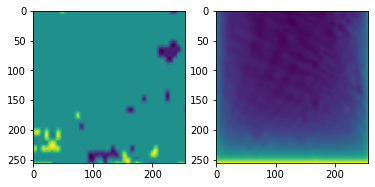

In [100]:
fig, axes = plt.subplots(ncols=2)
axes[0].imshow(raw_image)
axes[1].imshow(label)